# MK-Means Clustering Algorithm

This notebook and the accompagnying code contain a proof of concept for the mk-means clustering algorithm.
An explanatory article is in review at this moment. As soon as it is published, the notebook will be updated wit a link.

The library requires numba, statistics, matplotlib and scikit-learn to be installed locally.

(pip install ... or conda install ...)

If you have trouble running the library because of numba errors, simply remove all @njit lines from the library.
This will slow it down, but should not break anything else.

In [1]:
from mkmeans import *

from sklearn.cluster import KMeans

from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

In [2]:
# toy data sets
X_circles, y_circles = make_circles(n_samples=(300, 300), noise=0.1, factor=0.3, random_state=123)
X_moons, y_moons = make_moons(n_samples=500, noise=0.1, random_state=123)
X_blobs, y_blobs = make_blobs(n_samples=2000000, centers=[(1,3),(50,70)], cluster_std=8, random_state=123)

In [3]:
# A function to make plotting easy
# to plot an unlabeled dataset X use np.zeros(X.shape[0] as labels


def plot_clustering(X, labels):
    """
    Plots the clustering in color for 2 dimensional data sets.
    Taken from an example on the scikit-learn homepage and 
    adjusted. Reference below.
    """
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)
        
    plt.show()
        
#Adjusted from: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

# mk-means

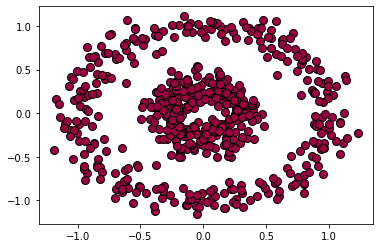

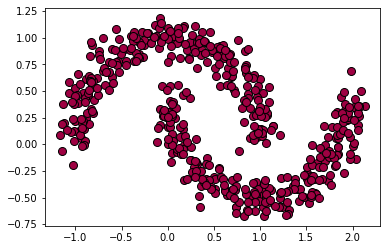

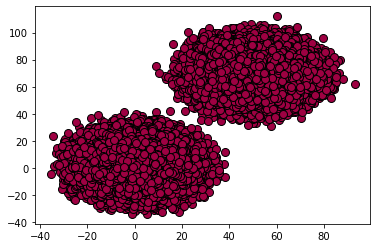

In [4]:
plot_clustering(X_circles, np.zeros(X_circles.shape[0]))
plot_clustering(X_moons, np.zeros(X_moons.shape[0]))
plot_clustering(X_blobs, np.zeros(X_blobs.shape[0]))

In [5]:
# Will take some time, blobs is a really big data set! 2M data points!
model_circles = KMeans(n_clusters=25).fit(X_circles)
model_moons = KMeans(n_clusters=25).fit(X_moons)
model_blobs = KMeans(n_clusters=25).fit(X_blobs)

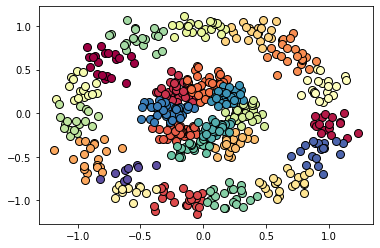

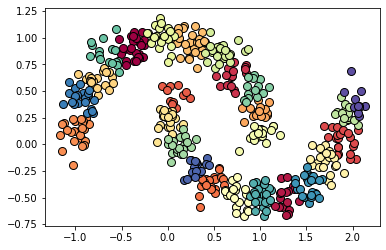

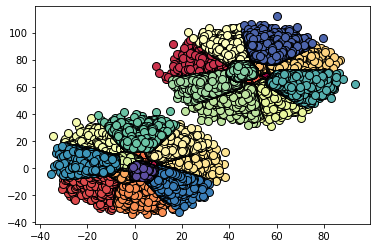

In [6]:
plot_clustering(X_circles, model_circles.labels_)
plot_clustering(X_moons, model_moons.labels_)
plot_clustering(X_blobs, model_blobs.labels_)

In [8]:
# Causes a numba warning on the first run
new_labels_circles = generate_macroclusters(X_circles, model_circles.cluster_centers_, model_circles.labels_)
new_labels_moons = generate_macroclusters(X_moons, model_moons.cluster_centers_, model_moons.labels_)
new_labels_blobs = generate_macroclusters(X_blobs, model_blobs.cluster_centers_, model_blobs.labels_)

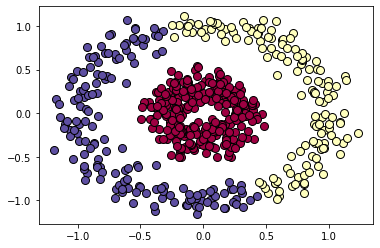

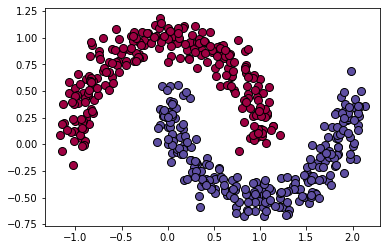

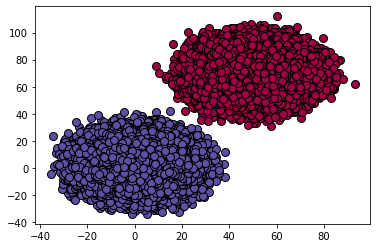

In [9]:
plot_clustering(X_circles, new_labels_circles) # not completely correct this time!
plot_clustering(X_moons, new_labels_moons)
plot_clustering(X_blobs, new_labels_blobs)

# k-line plots

In [10]:
# This function might cause a numba warning the first time it runs. Just rerun it.
# Since the function uses sampling and is not yet parallelized, this may take some time, likely 2-3 minutes
# It is a proof of concept

k_line_data = generate_k_line_data(X_moons, 10, 101, 10, times=10) # X, k_min, k_max, step, samples

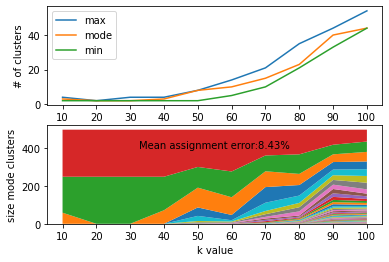

In [11]:
plot_k_line_data(k_line_data)

In [12]:
y_moons[:10]

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0])

In [13]:
new_labels_moons[:10]

array([-3, -2, -2, -2, -2, -3, -3, -2, -2, -3])

In [14]:
False not in (new_labels_moons+3 == y_moons) # everything correct

True